# Generalized inverses 

We have seen examples of left inverses for injective functions and right inverses for surjective functions. 
These left/right inverses are not inverses in full sense of the word, but they are functions that have the effect of "undoing" the action of a function (for left inverses) or doing something that the function "undoes" (for right inverses).

We have also seen that left/right inverses have an interesting property when they are applied on the "other side," i.e., on the right/left, respectively: they are idempotent.
Thus, they act as an identity when restricted to the image (of the function or right inverse, respectively).

If a function $f:A\to B$ is neither injective nor surjective, then neither a left nor a right inverse exists.
However, we can still have a type of inverse called a _generalized inverse_.
A generalized inverse of a function $f:A\to B$ is a function $g:B\to A$ such that $g \circ f \circ g = g$ and $f\circ g\circ f = f$.

- The property $g \circ f \circ g = g$ is a generalization of the left inverse condition that $g \circ f = I_A$.
- The property $f\circ g\circ f = f$ is a generalization of the right inverse condition that $f \circ g = I_B$.

Interestingly, generalized inverses are easier to work with than left/right inverses.
- Any left inverse of a function $f$ satisfies both generalized inverse conditions.
- Any right inverse of a function $f$ satisfies both generalized inverse conditions.
- If a function $f$ and a generalized inverse $g$ of that function are _not_ restricted to their images, then their product (in either order, i.e., both $f \circ g$ and $g \circ f$) is idempotent. 
- If a function $f$ and a generalized inverse $g$ of that function are restricted to their images, then their product (in either order, i.e., both $f \circ g$ and $g \circ f$) is an Identity.

Generalized inverses can be illustrated using the table operations we've seen before.
However, these examples tend to get messy when dealing with domains and ranges. 
(The problem is not conceptual.  It's just that dataframes were not designed to do this.)
For that reason, we will stick to simple numerical examples in this section.
However, you should keep in mind that the concepts do apply to the data frame perspective that we've worked with.


## Left inverses are generalized inverses

The first fact which we will study is that if $f$ has a left inverse $g$, then this left inverse is also a generalized inverse. 
We can see this algebraically, since $g\circ f$ is the identity function on $A$.
Thus, we have that
\begin{equation*}
f\circ g \circ f = f\circ \text{Id}_A = f
\quad
\mbox{and}
\quad
g\circ f \circ g = \text{Id}_B g = g .
\end{equation*}
Let's look at an example of a left inverse from one of the previous workbooks.

Recall the function $f:\mathbb{Z}\to\mathbb{R}$, where $\mathbb{Z} = \{\dots, -2,-1,0,1,2,\dots\}$ is the set of integers, and $\mathbb{R}$ is the set of real numbers. 
We define the function $f$ as follows: for any integer $z\in \mathbb{Z}$, let $f(z)$ be a random number in the interval $(z-1/2, z+1/2)$. 
Here is a python function which does this.

In [1]:
import numpy as np
np.random.seed(0) # set random seed for reproducibility
r = np.random.uniform(low=-.5, high=.5)

def f(z):
    return z + r

As we saw, a natural left inverse for this function is the function $g:\mathbb{R}\to\mathbb{Z}$ which rounds a real number $x$ to the nearest integer. 
Here is a python function which does this.

In [2]:
def g(y):
    return np.rint(y)

Our claim is that, since $g$ is a left inverse for $f$, it must also be a generalized inverse. To check this numerically, we want to check that $(f\circ g \circ f)(z) = f(z)$ for any integer $z$. Let's see a few examples.

In [3]:
print('f(-5) = %f' % f(-5))
print('(f o g o f)(-5) = %f' % f(g(f(-5))))
print('')
print('f(2) = %f' % f(2))
print('(f o g o f)(2) = %f' % f(g(f(2))))
print('')
print('f(14) = %f' % f(14))
print('(f o g o f)(14) = %f' % f(g(f(14))))

f(-5) = -4.951186
(f o g o f)(-5) = -4.951186

f(2) = 2.048814
(f o g o f)(2) = 2.048814

f(14) = 14.048814
(f o g o f)(14) = 14.048814


Indeed, as expected, we have that $(f \circ g \circ f)(z) = f(z)$.

We likewise have that $(g \circ f \circ g)(z) = g(z)$:

In [4]:
print('g(-5.7) = %i' % g(-5.7))
print('(g o f o g)(-5.7) = %i' % g(f(g(-5.7))))
print('')
print('g(2.1) = %i' % g(2.1))
print('(g o f o g)(2.1) = %i' % g(f(g(2.1))))
print('')
print('g(14.2) = %i' % g(14.2))
print('(g o f o g)(14.2) = %i' % g(f(g(14.2))))

g(-5.7) = -6
(g o f o g)(-5.7) = -6

g(2.1) = 2
(g o f o g)(2.1) = 2

g(14.2) = 14
(g o f o g)(14.2) = 14


## Right inverses are generalized inverses

Similar to left inverses, if a function $f:A\to B$ has a right inverse $g$, then this function must also be a generalized inverse. 
In this case, $f\circ g$ is the identity function on $B$.
Thus, we have that
\begin{equation*}
f\circ g \circ f = f\circ \text{Id}_A = f
\quad
\mbox{and}
\quad
g\circ f \circ g = \text{Id}_B g = g .
\end{equation*}
Let's now use one of our examples from the workbook on surjective functions and right inverses to verify this.

Consider again the surjective function $f:\mathbb{R}\to\mathbb{Z}$, which maps any real number $x$ to an integer $f(x)$ by rounding $x$ to the nearest integer. 
In python,

In [5]:
import numpy as np

def f(x):
    return np.rint(x)

We showed that there are many possible right inverses for this function, but one is the function $g(z)$ which takes an integer $z$, and returns the real number $z-.1$:

In [6]:
def g(z):
    return z-.1

Let's verify that this function satisfies the first generalized inverse condition $(f\circ g \circ f) = f$ on a few test points.

In [7]:
print('f(-5.314) = %i' % f(-5.314))
print('(f o g o f)(-5.314) = %i' % f(g(f(-5.314))))
print('')
print('f(2.67) = %i' % f(2.67))
print('(f o g o f)(2.67) = %i' % f(g(f(2.67))))
print('')
print('f(18.45) = %i' % f(18.45))
print('(f o g o f)(18.45) = %i' % f(g(f(18.45))))

f(-5.314) = -5
(f o g o f)(-5.314) = -5

f(2.67) = 3
(f o g o f)(2.67) = 3

f(18.45) = 18
(f o g o f)(18.45) = 18


It is also easy to show that $g \circ f \circ g = g$.

Thus, the function $g$ is indeed a generalized inverse for $f$. 


## A function with a generalized inverse, but no left or right inverse

In the last two examples, we saw that left and right inverses are automatically also generalized inverses. 
However, a function need not be injective or surjective in order to have a generalized inverse. 
For example, 
let's consider the sets
$ A = \{1,2,3,4,5\} $ 
and 
$ B = \{a,b,c\} $; and
let's consider the function $f$ given in the following table.

| $x$  | $f(x)$ |
| ---- | ------ |
| $1$  | $a$    |
| $2$  | $b$    |
| $3$  | $a$    |
| $4$  | $b$    |
| $5$  | $b$    |

This function is neither injective (for example, $1$ and 3 map to the same output) nor surjective (no element maps to $c$). 
However, we can still construct a function $g:B\to A$ which is a generalized inverse for $f$. 
First, let's implement the function $f$ in python. 
A natural way to do this is with a dictionary.

In [8]:
f = {1:'a', 2:'b', 3:'a', 4:'b', 5:'b'}

We can access the value of, say, $f(1)$ with the following

In [9]:
f[1]

'a'

 Consider the function $g$ defined in the following table

| $y$  | $g(y)$ |
| ---- | ------ |
| $a$  | $1$    |
| $b$  | $2$    |
| $c$  | $2$    |

This is indeed a valid function on the set $B$. 
Let's implement it in python in another dictionary:

In [10]:
g = {'a':1, 'b':2, 'c':2}

Now let's check whether this function satisfies
$$
f\circ g\circ f = f
$$
for all inputs $x\in A$. 
We can do this with the following code:

In [11]:
for x in range(1,6):
    print('f(%i) = %s' % (x, f[x]))
    print('(f o g o f)(%i) = %s' % (x, f[g[f[x]]]))
    print('')

f(1) = a
(f o g o f)(1) = a

f(2) = b
(f o g o f)(2) = b

f(3) = a
(f o g o f)(3) = a

f(4) = b
(f o g o f)(4) = b

f(5) = b
(f o g o f)(5) = b



As we can see from the output, we do indeed have that $(f\circ g \circ f)(x) = f(x)$ for all $x\in A$.
Similarly, we can also confirm that $g \circ f \circ g = g$:

In [12]:
for x in ['a', 'b', 'c']:
    print('g(%s) = %s' % (x, g[x]))
    print('(g o f o g)(%s) = %s' % (x, g[f[g[x]]]))
    print('')

g(a) = 1
(g o f o g)(a) = 1

g(b) = 2
(g o f o g)(b) = 2

g(c) = 2
(g o f o g)(c) = 2



So, $g$ is a generalized inverse for $f$, even though $f$ is neither injective nor surjective.


## Another example of a generalized inverse

Here we give a more realistic example of a function with a generalized inverse. 

Consider the function $f:\mathbb{R}\to \mathbb{R}$ defined as follows:
$$
f(x) = \begin{cases}-1 & \text{if } x<-1\\ x^3 &\text{if }-1\leq x\leq 1\\ 1&\text{if }x>1 \end{cases}
$$

Here is this function written in python.

In [13]:
import matplotlib.pyplot as plt

def f(x):
    if x<-1:
        return -1
    elif x > 1:
        return 1
    else:
        return x**3

xx = np.arange(-2,2.01,.01)
fx = [f(x) for x in xx]

plt.plot(xx, fx, label='f(x)')
plt.legend()
plt.ylim(-2,2)
plt.show()

<Figure size 640x480 with 1 Axes>

This function is neither injective nor surjective. 
Indeed, note that for the points $x=-1.5, x'=-2$, $f(x) = f(x')$, even though $x\neq x'$. 
Therefore $f$ cannot be injective. 
Moreover, there is no $x\in \mathbb{R}$ such that $f(x)=-2$. 
Therefore $f$ also cannot be surjective. 
As a consequence, $f$ does not have any left or right inverses. 
However, it does have a generalized inverse. 
For example, consider the function $g(x) = x^{1/3}$ (i.e., the cube-root of $x$). 
Let's see what happens when we compute $f\circ g\circ f$. 
We have for $x<-1$, we get 
\begin{equation*}
f(g(f(x))) = f(g(-1)) = f(-1) = -1 = f(x)
\end{equation*}
Similarly, for $x>1$, we get 
\begin{equation*}
f(g(f(x))) = f(g(1)) = f(1) = 1 = f(x)
\end{equation*}
Finally, if $-1\leq x\leq 1$, we get 
\begin{equation*}
f(g(f(x))) = f(g(x^3)) = f((x^3)^{1/3}) = f(x)
\end{equation*}
Thus, we have that $f\circ g\circ f = f$, and so $g$ is a generalized inverse for $f$. 
Let's plot $f\circ g \circ f$ and see why this is the case.

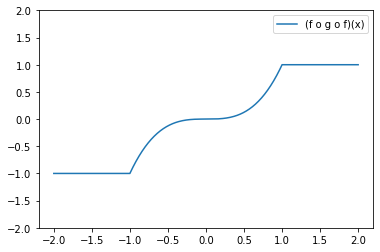

In [14]:
def g(x):
    # use this trick to compute the cube root in python: x^(1/3) = sign(x)*|x|^(1/3)
    return np.sign(x)*np.abs(x)**(1./3.)

fgfx = [f(g(f(x))) for x in xx]

plt.plot(xx, fgfx, label='(f o g o f)(x)')
plt.legend()
plt.ylim(-2,2)
plt.show()

Indeed, we see visually that the plot of $f\circ g\circ f$ is the same as the plot of $f$, again verifying that these two functions are the same.
If we plotted $g \circ f \circ g$, we would see that it equals $g$.
Therefore, $g$ is a generalized inverse for $f$. 

Is this the only generalized inverse for $f$? 
No! 
If we look back at our argument above, we realize that it didn't matter what $g$ did on points outside of the interval $[-1,1]$; indeed, another valid generalized inverse for $f$ would be
\begin{equation*}
g_2(x) = \begin{cases}x^{1/3} & \text{if } x\leq 1\\ 500 &\text{if } x>1\end{cases}
\end{equation*}
Let's implement this and verify again visually that $f\circ g_2 \circ f = f$.

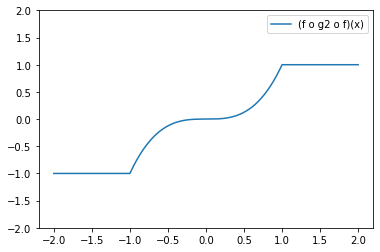

In [15]:
def g2(x):
    if x <= 1:
        # use this trick to compute the cube root in python: x^(1/3) = sign(x)*|x|^(1/3)
        return np.sign(x)*np.abs(x)**(1./3.)
    else:
        return 500

fg2fx = [f(g2(f(x))) for x in xx]

plt.plot(xx, fg2fx, label='(f o g2 o f)(x)')
plt.legend()
plt.ylim(-2,2)
plt.show()

As expected, the plot of $f\circ g_2 \circ f$ is identical to the plot of $f$.

If we plotted $g_2 \circ f \circ g_2$, we would see that it equals $g_2$.